# Practical 3 - EVSC20007 Modelling the Real World: Systems Models

## Preliminary reading
Before attempting this practical, make sure you have reviewed and are familiar with the following material:
- Lecture 8 (Epidemiological modelling)
- Workshop, Week 3
- Practical 1 (Week 4)

## The Zombie apocalypse
<img src="zombie.png" width="25%" align="center"> </img>

The zombie apocalypse has started in the real world, and we are concerned about the short-term survival of the human race. We need you to build a model to prevent it from ending the human race in the real world.  Although the details of a zombie infection vary from outbreak to outbreak, the common characteristics are: 
- An outbreak begins when a small number of zombies appear in an otherwise susceptible population. The reports we have suggest there are currently 42 zombies in Canberra, which has a population of 400,000 humans. 
- A human becomes a zombie on average 3 days after being bitten by a zombie. 
- The only way that a zombie can be killed is by a human destroying its brain.  
- When a zombie encounters a human, they fight, ending in either the human being bitten or the zombie’s brain being destroyed. 
- From the initial reports, it seems a zombie is biting on average 4 humans before being destroyed. 
- On average, a specific zombie will encounter a specific uninfected human once every 100 days.

## Assignment tasks

### Question 1 [25 marks]
Think about what is needed to build this model:

*a. Refine the question to answer with your model and restate it in your own words.*

- How many individulas are projected to be infected?
- How many zombies are projected?
- How long does it take for human to meet a zombie and get infected?
- How many zombies are going to die?

*b. What compartments will we need for this model? What are your dependent and independent variables?*  

Compartments needed are:
- Human
- Zombie
- Dead Zombie

Independent variable : 
- time,t

Dependent variable:
- Human Population
- Zombie Population
- Number of Zombie dies

*c. How is the infection transmitted? How do zombies become ‘removed’? What parameters are needed?*

Infection transmitted:
- When a human encounters a zombie and being bitten by it which average every 100 days 

Zombie become 'removed':
- When a zombie's brain is destroyed by human, this average every 400 days since a zombie's brain is destroyed after 4 humans and it takes 100 days for a zombie to meet a human

Parameter needed: 
- Rate of infection (Human encounters and zombie and being beaten)
- Rate of recovery (Zombie's brain is destroyed)

*d. What types of interventions might work here? Which variables or parameters 
might they affect?*

Intervention might work: 
- destroying all the zombie's brain and all the human turning into zombies brain
- Kill all the zombie before it meets the first human (i.e before 100 days)
- Develop a vaccine for human before the first zombie and human encounter (i.e before 100 days)

The variables/paramters might they effect:-
- rate of infection
- rate of recovery
- number of human
- number of zombie
- number of zombie dies

### Question 2 [25 marks]
Draw a schematic diagram for your model (referred to as compartmental models in lectures), and write down explicit mathematical expressions for the compartment transitions (e.g. a system of ODEs). There are multiple plausible good models for this part - but you should explain your model, and argue for any assumptions you have made.  

- N is the total number of individuals in the populations
- S is the number of human population
- I is the number of zombie population
- R is the number of zombie dies
- b is the rate of infection
- g is the rate of recovery
- Transitions between compartments are dependent on the number of human and zombie individuals
- Population is well-mixed
- Every individuals has similar transition properties
- infection rate, recovery rate are constant
- N is constant (birth rate equal to death rate,m) 

Mathematical equations: 
- dS/dt = - (b*S*I) / N
- dI/dt = (b*S*I)/N - g*I
- dR/dt = g*I
- N = S + I + R

Explanation / Assumption of model:
- It takes on average 100 days for human to encounter a zombie and successfully being bitten by it. The time it takes for human to become zombie is considered negligible
- It takes on average 400 days for zombie's brain is destroyed and died
- Zombies will only die and there is no vaccine and immunization for zombies to 'recover'
- There is no migration that takes places.
- There is no drastic public measure i.e goverment intervention to curb the zombie outbreak.

### Question 3 [30 marks]
Explore your model using techniques from this subject, including computationally (or analytically) where appropriate. You may find it helpful to use the code below, or adapt code from previous lectures or workshops.

*a. What will happen to the populations of humans and zombies in the next 2 years?*

In [95]:
import numpy as np
from scipy.integrate import odeint

class DeterministicSIR():
    def __init__(self,
                 infection_rate=1,
                 recovery_rate=1,
                 population_size=1000):
        self.infection_rate = infection_rate
        self.recovery_rate = recovery_rate
        self.population_size = population_size
        
    def rates_of_change(self, states):
        beta = self.infection_rate
        gamma = self.recovery_rate
        N = self.population_size
        
        S = states[0]
        I = states[1]
        R = N-S-I # calculate R from S and I
        
        dSdt = -beta*S*I/N
        dIdt = beta*S*I/N - gamma*I
        
        return np.array([dSdt,dIdt])
    
    def simulate(self, S0, I0, t):
        def f(x,T): return self.rates_of_change(x)
        x0 = np.array([S0, I0])
        sol = odeint(f, x0, t)
        
        S = sol[:,0]
        I = sol[:,1]
        R = self.population_size - S - I
        
        return (S, I, R)

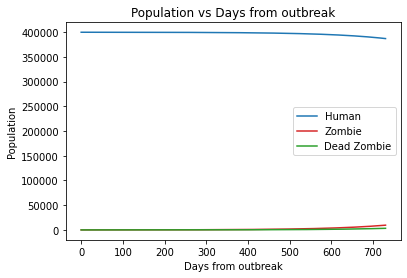

In [101]:
from matplotlib import pyplot as plt

model = DeterministicSIR(infection_rate = 1/100, # How long does it take for Zombie to infect human
                         recovery_rate = 1/400, # How long does it take for Zombie to die
                         population_size = 400000) # Initial Human Population


t = np.linspace(0,730,1001) # 2 years = 730 days
I0 = 42 # Initial Zombie Population
S0 = model.population_size - I0
(S,I,R) = model.simulate(S0, I0, t)


def plot_results(t,S,I,R):
    fig = plt.figure()
    plt.plot(t, S, label="Human")
    plt.plot(t, I, color="C3", label="Zombie")
    plt.plot(t, R, color="C2", label="Dead Zombie")
    plt.xlabel("Days from outbreak")
    plt.ylabel("Population")
    plt.title('Population vs Days from outbreak')
    plt.legend()
    return fig

fig = plot_results(t,S,I,R)

Discussion:
- The outbreak is not fatal it the 2 years period (730 days) since it takes 100 days for human to encounter a zombie and to be bitten by it.
- There is only sign of human turning into zombie (i.e the human population decreasing while zombie population increasing) after 600 days.
- number of dead zombie stayed relatively constant throughout the two years

*b. What strategies might be most effective to combat the zombie epidemic?*

- destroying all the zombie's brain and all the human turning into zombie's brain
- Kill all the zombie before it meets the first human (i.e before 100 days)
- Develop a vaccine for human before the first zombie and human encounter (i.e before 100 days)
- There is wide public measure i.e government intervention to seperate the human and zombie before 100 days.

### Question 4 [20 marks]
Discuss how your model might change to consider the following new pieces of information, and explore the effect on your answers to part 2. In particular, make sure you discuss how the schematic diagram, equations and variables would change.

*a. We’ve managed to survive the short-term, but are concerned about the long-term survival of the human race.*

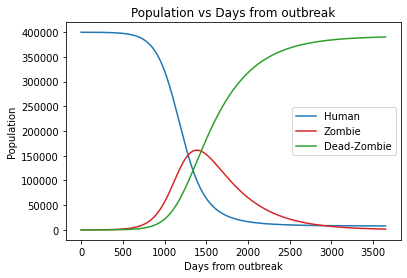

In [102]:
from matplotlib import pyplot as plt

model = DeterministicSIR(infection_rate = 1/100,
                         recovery_rate = 1/400,
                         population_size = 400000)


t = np.linspace(0,3650,1001) # 3650 days = 10 years.
I0 = 42
S0 = model.population_size - I0
(S,I,R) = model.simulate(S0, I0, t)


def plot_results(t,S,I,R):
    fig = plt.figure()
    plt.plot(t, S, label="Human")
    plt.plot(t, I, color="C3", label="Zombie")
    plt.plot(t, R, color="C2", label="Dead-Zombie")
    plt.xlabel("Days from outbreak")
    plt.ylabel("Population")
    plt.title("Population vs Days from outbreak")
    plt.legend()
    return fig

fig = plot_results(t,S,I,R)

Discussion:
- The number of human being decrease exponentially in a 10 year period
- The number of zombie increase exponentially during the 500th day and reached the highest point at around 1250th days and then decrease exponentially afterwards
- The number of dead zombie represent a S-curve where the number of dead zombie increase exponentially around 1000th and stagnates at 2500th day to 3500th day.
- The entire population of human and zombie in the area will extinct after 10 years.

*b. A vaccine is developed that prevents bites from infecting humans.*

Effect of vaccine:
- rate of infection becomes zero

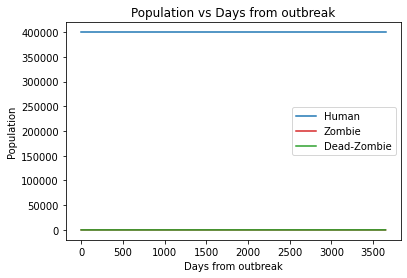

In [103]:
from matplotlib import pyplot as plt

model = DeterministicSIR(infection_rate = 0, #if vaccine is developed before zombie meets a human (i.e 100 days)
                         recovery_rate = 1/400,
                         population_size = 400000)


t = np.linspace(0,3650,1001) # 3650 days = 10 years.
I0 = 42
S0 = model.population_size - I0
(S,I,R) = model.simulate(S0, I0, t)


def plot_results(t,S,I,R):
    fig = plt.figure()
    plt.plot(t, S, label="Human")
    plt.plot(t, I, color="C3", label="Zombie")
    plt.plot(t, R, color="C2", label="Dead-Zombie")
    plt.xlabel("Days from outbreak")
    plt.ylabel("Population")
    plt.title("Population vs Days from outbreak")
    plt.legend()
    return fig

fig = plot_results(t,S,I,R)

Discussion: 
- The number of human is unaffected and stay constant
- The number of Zombie is unaffected and stay constant 
- The number of dead zombie is unaffected and stay constant
- A zombie apocalypse is prevented.